## Data from https://www.kaggle.com/competitions/spaceship-titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


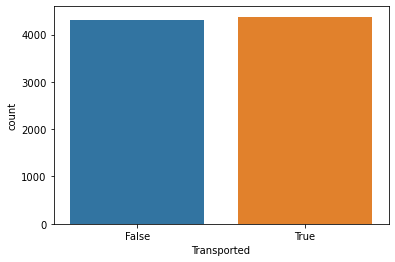

In [5]:
sns.countplot(data=df, x='Transported');

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [5]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

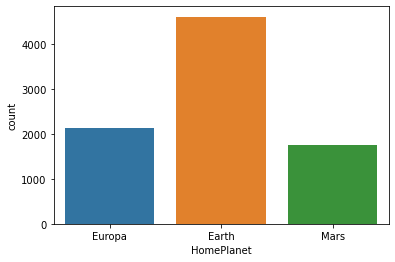

In [6]:
sns.countplot(x=df.HomePlanet);

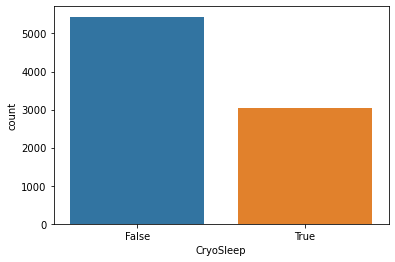

In [7]:
sns.countplot(x=df.CryoSleep);

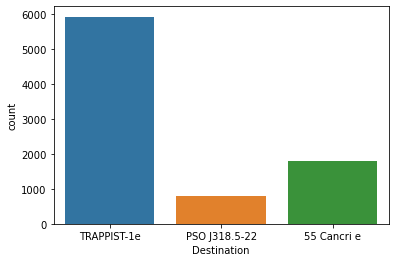

In [8]:
sns.countplot(x=df.Destination);

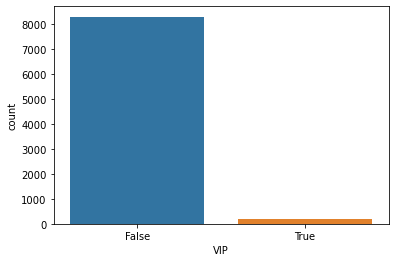

In [9]:
sns.countplot(x=df.VIP);

In [10]:
df['First_Letter_cabin'] = df['Cabin'].str.split('/').str[0]

In [11]:
df['Number_cabin'] = df['Cabin'].str.split('/').str[1]

In [12]:
df['Last_Letter_cabin'] = df['Cabin'].str.split('/').str[2]

In [13]:
df.First_Letter_cabin.value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: First_Letter_cabin, dtype: int64

In [14]:
df.Last_Letter_cabin.value_counts()

S    4288
P    4206
Name: Last_Letter_cabin, dtype: int64

In [20]:
train_filna = df.fillna({'HomePlanet':'Earth', 
                      'CryoSleep':False,
                      'Destination':'TRAPPIST-1e',
                      'Age':28.827930,
                      'VIP':False,
                      'RoomService':df.RoomService.median(),
                      'FoodCourt':df.FoodCourt.median(),
                      'ShoppingMall':df.ShoppingMall.median(),
                      'Spa': df.Spa.median(),
                      'VRDeck':df.VRDeck.median(),
                      'First_Letter_cabin':'F',
                      'Last_Letter_cabin': 'S',
                      'Number_cabin':'28'})

In [21]:
train_filna['Number_cabin'] = train_filna['Number_cabin'].apply(lambda s: int(s))

In [22]:
train_filna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         8693 non-null   object 
 1   HomePlanet          8693 non-null   object 
 2   CryoSleep           8693 non-null   bool   
 3   Cabin               8494 non-null   object 
 4   Destination         8693 non-null   object 
 5   Age                 8693 non-null   float64
 6   VIP                 8693 non-null   bool   
 7   RoomService         8693 non-null   float64
 8   FoodCourt           8693 non-null   float64
 9   ShoppingMall        8693 non-null   float64
 10  Spa                 8693 non-null   float64
 11  VRDeck              8693 non-null   float64
 12  Name                8493 non-null   object 
 13  Transported         8693 non-null   bool   
 14  First_Letter_cabin  8693 non-null   object 
 15  Number_cabin        8693 non-null   int64  
 16  Last_L

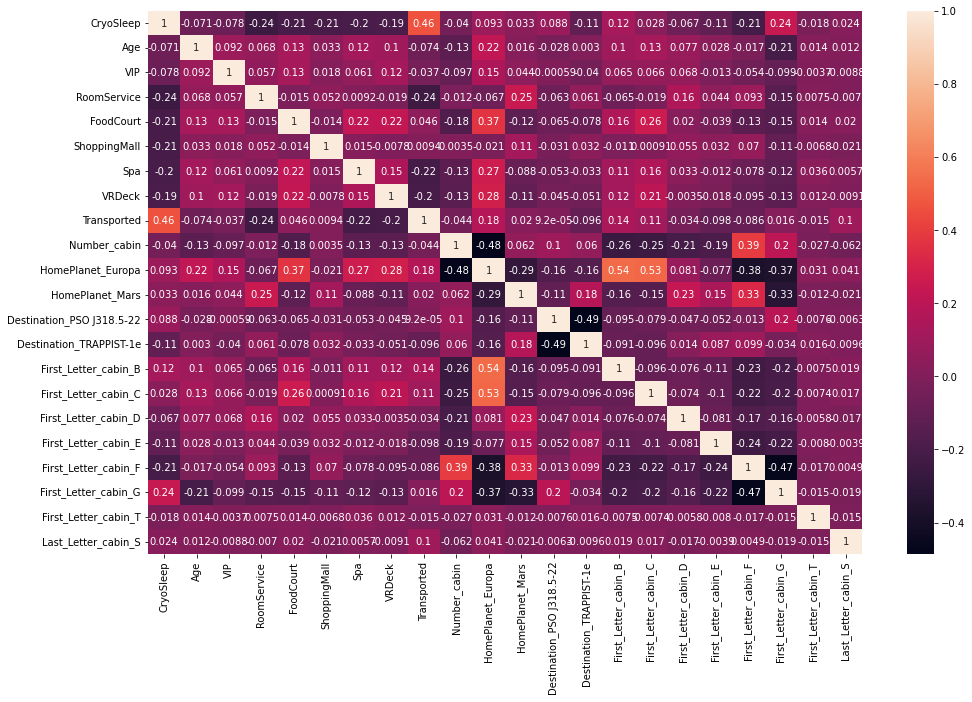

In [16]:
plt.figure(figsize=(16,10))
sns.heatmap(pd.get_dummies(train_filna.drop(['PassengerId', 'Cabin', 'Name'], axis=1), drop_first=True).corr(), annot=True);

In [23]:
corr = pd.get_dummies(train_filna.drop(['PassengerId', 'Cabin', 'Name'], axis=1), drop_first=True).corr()[['Transported']].reset_index()

In [24]:
corr.columns = ['Feature', 'Pearson correlation coefficient']

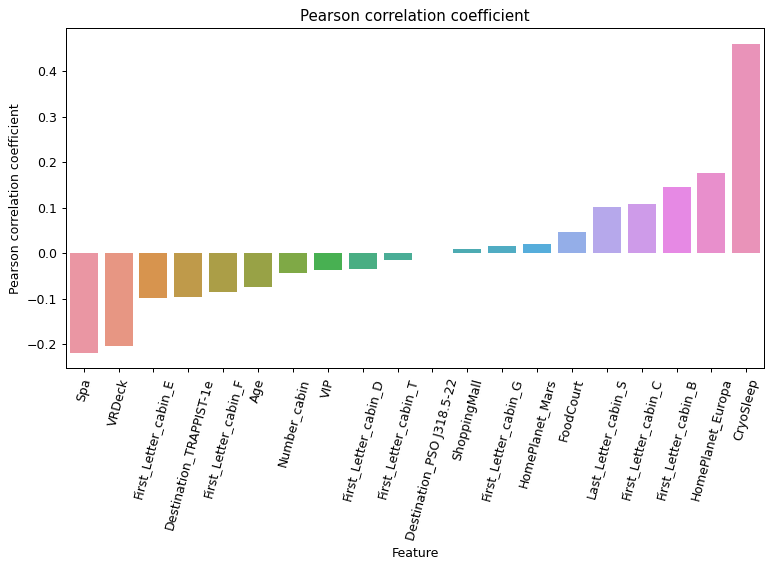

In [25]:
plt.figure(figsize=(10,5), dpi=90)
sns.barplot(x='Feature', y='Pearson correlation coefficient', data=corr.sort_values(by='Pearson correlation coefficient').iloc[1:-1])
plt.title("Pearson correlation coefficient")
plt.xticks(rotation=75);

In [42]:
X = pd.get_dummies(train_filna.drop(['PassengerId', 'Cabin', 'Name', 'Transported'], axis=1), drop_first=True).values

In [27]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()

In [44]:
y = le.fit_transform(train_filna.Transported)

# Train_test_split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Data scaling (for XGBRFClassifier and SVC)

In [85]:
from sklearn.preprocessing import StandardScaler

In [114]:
scaler = StandardScaler()

In [115]:
scaled_X_train = scaler.fit_transform(X_train)

In [116]:
scaled_X_test = scaler.transform(X_test)

# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
from sklearn.model_selection import GridSearchCV

In [45]:
params = {'n_estimators':[50,75,100], 'max_features':['auto',"log2"], 'max_depth':[6, 7,8,9]}

In [46]:
random_tree = RandomForestClassifier(criterion='entropy')

In [47]:
grid_random_tree = GridSearchCV(random_tree, param_grid=params)

In [48]:
grid_random_tree.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(criterion='entropy'),
             param_grid={'max_depth': [6, 7, 8, 9],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [50, 75, 100]})

In [49]:
grid_random_tree.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       n_estimators=50)

In [50]:
grid_random_tree_predictions = grid_random_tree.predict(X_test)

#### RandomForest Evaluation

In [51]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

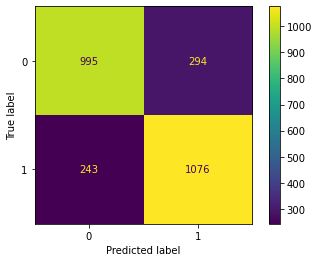

In [52]:
plot_confusion_matrix(grid_random_tree, X_test, y_test)

In [53]:
print(classification_report(y_test, grid_random_tree_predictions))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1289
           1       0.79      0.82      0.80      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



In [54]:
from sklearn.model_selection import learning_curve

In [55]:
train_sizes, train_scores, valid_scores = learning_curve(RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       n_estimators=50), X_train, y_train, train_sizes=[40, 50, 80, 90, 110], cv=5)

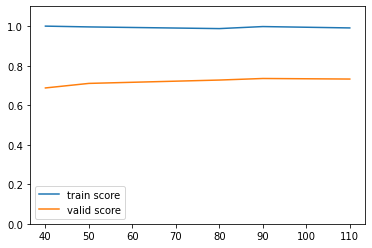

In [80]:
plt.plot(train_sizes, [train_scores[0].mean(),train_scores[1].mean(), train_scores[2].mean(), train_scores[3].mean(), train_scores[4].mean()], label='train score')
plt.plot(train_sizes, [valid_scores[0].mean(),valid_scores[1].mean(), valid_scores[2].mean(), valid_scores[3].mean(), valid_scores[4].mean()], label='valid score')
plt.ylim((0, 1.1))
plt.legend();

In [126]:
from sklearn.ensemble import AdaBoostClassifier

In [127]:
random_tree = RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=50)

In [128]:
ada = AdaBoostClassifier(random_tree)

In [129]:
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                         max_depth=9,
                                                         n_estimators=50))

In [131]:
ada_pred = ada.predict(X_test)

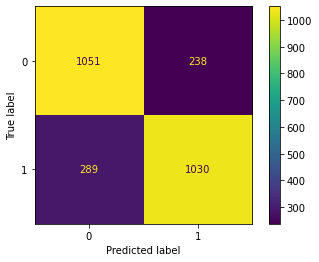

In [132]:
plot_confusion_matrix(ada, X_test, y_test)

In [133]:
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1289
           1       0.81      0.78      0.80      1319

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



In [145]:
from sklearn.metrics import plot_roc_curve

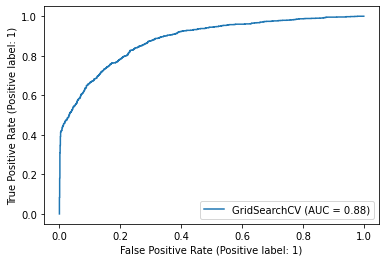

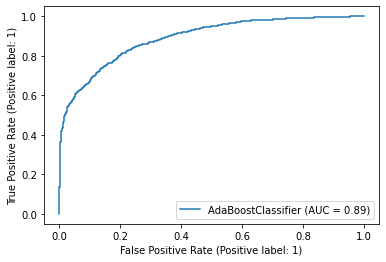

In [148]:
plot_roc_curve(grid_random_tree,X_test,y_test);
plot_roc_curve(ada,X_test,y_test);

## Xgboost

In [81]:
from xgboost import XGBRFClassifier

In [82]:
xg = XGBRFClassifier(use_label_encoder=False)

In [89]:
xg.fit(scaled_X_train, y_train)

[19:40:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=4,
                num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact',
                use_label_encoder=False, validate_parameters=1, verbosity=None)

In [90]:
xg_h = xg.predict(scaled_X_test)

In [91]:
print(classification_report(y_test, xg_h))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77      1289
           1       0.75      0.87      0.81      1319

    accuracy                           0.79      2608
   macro avg       0.80      0.79      0.79      2608
weighted avg       0.80      0.79      0.79      2608



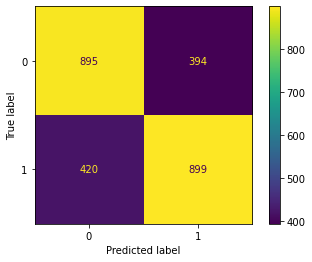

In [92]:
plot_confusion_matrix(xg, X_test, y_test)

## Neural Network

In [93]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
scaler = MinMaxScaler()

In [95]:
scaled_X_train = scaler.fit_transform(X_train)

In [49]:
scaled_X_test = scaler.transform(X_test)

In [50]:
from tensorflow.keras.models import Sequential

In [51]:
from tensorflow.keras.layers import Dense

In [55]:
model = Sequential()

In [54]:
from tensorflow.keras.layers import Dropout

In [56]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [58]:
model.fit(scaled_X_train,y_train,epochs=600,validation_data=(scaled_X_test,y_test))

Epoch 1/600
191/191 [==============================] - 2s 4ms/step - loss: 2.5368 - val_loss: 0.6766
Epoch 2/600
191/191 [==============================] - 1s 3ms/step - loss: 1.3760 - val_loss: 0.6239
Epoch 3/600
191/191 [==============================] - 1s 3ms/step - loss: 1.0602 - val_loss: 0.6338
Epoch 4/600
191/191 [==============================] - 1s 3ms/step - loss: 0.9412 - val_loss: 0.5760
Epoch 5/600
191/191 [==============================] - 1s 4ms/step - loss: 0.8727 - val_loss: 0.5551
Epoch 6/600
191/191 [==============================] - 1s 4ms/step - loss: 0.7885 - val_loss: 0.5382
Epoch 7/600
191/191 [==============================] - 1s 3ms/step - loss: 0.8403 - val_loss: 0.5443
Epoch 8/600
191/191 [==============================] - 1s 3ms/step - loss: 0.7643 - val_loss: 0.5494
Epoch 9/600
191/191 [==============================] - 0s 2ms/step - loss: 0.7182 - val_loss: 0.5515
Epoch 10/600
191/191 [==============================] - 0s 3ms/step - loss: 0.6965 - val_lo

Epoch 161/600
191/191 [==============================] - 1s 3ms/step - loss: 0.4876 - val_loss: 0.4544
Epoch 162/600
191/191 [==============================] - 1s 3ms/step - loss: 0.4781 - val_loss: 0.4490
Epoch 163/600
191/191 [==============================] - 1s 4ms/step - loss: 0.4837 - val_loss: 0.4460
Epoch 164/600
191/191 [==============================] - 1s 3ms/step - loss: 0.4778 - val_loss: 0.4523
Epoch 165/600
191/191 [==============================] - 1s 3ms/step - loss: 0.4701 - val_loss: 0.4502
Epoch 166/600
191/191 [==============================] - 0s 2ms/step - loss: 0.4905 - val_loss: 0.4454
Epoch 167/600
191/191 [==============================] - 0s 3ms/step - loss: 0.4725 - val_loss: 0.4416
Epoch 168/600
191/191 [==============================] - 1s 3ms/step - loss: 0.4684 - val_loss: 0.4402
Epoch 169/600
191/191 [==============================] - 1s 3ms/step - loss: 0.4849 - val_loss: 0.4472
Epoch 170/600
191/191 [==============================] - 0s 2ms/step - lo

191/191 [==============================] - 1s 3ms/step - loss: 0.4736 - val_loss: 0.4678
Epoch 320/600
191/191 [==============================] - 1s 3ms/step - loss: 0.4667 - val_loss: 0.4537
Epoch 321/600
191/191 [==============================] - 1s 3ms/step - loss: 0.4846 - val_loss: 0.4738
Epoch 322/600
191/191 [==============================] - 0s 3ms/step - loss: 0.4639 - val_loss: 0.4538
Epoch 323/600
191/191 [==============================] - 1s 3ms/step - loss: 0.4718 - val_loss: 0.4621
Epoch 324/600
191/191 [==============================] - 1s 3ms/step - loss: 0.4663 - val_loss: 0.4587
Epoch 325/600
191/191 [==============================] - 1s 3ms/step - loss: 0.4695 - val_loss: 0.4508
Epoch 326/600
191/191 [==============================] - 1s 4ms/step - loss: 0.4662 - val_loss: 0.4721
Epoch 327/600
191/191 [==============================] - 1s 3ms/step - loss: 0.4699 - val_loss: 0.4599
Epoch 328/600
191/191 [==============================] - 1s 4ms/step - loss: 0.4677 - v

191/191 [==============================] - 2s 8ms/step - loss: 0.4628 - val_loss: 0.4765
Epoch 478/600
191/191 [==============================] - 2s 9ms/step - loss: 0.4647 - val_loss: 0.4734
Epoch 479/600
191/191 [==============================] - 1s 7ms/step - loss: 0.4649 - val_loss: 0.4787
Epoch 480/600
191/191 [==============================] - 1s 7ms/step - loss: 0.4538 - val_loss: 0.4833
Epoch 481/600
191/191 [==============================] - 1s 7ms/step - loss: 0.4603 - val_loss: 0.4883
Epoch 482/600
191/191 [==============================] - 1s 6ms/step - loss: 0.4532 - val_loss: 0.4882
Epoch 483/600
191/191 [==============================] - 1s 6ms/step - loss: 0.4662 - val_loss: 0.4842
Epoch 484/600
191/191 [==============================] - 1s 7ms/step - loss: 0.4575 - val_loss: 0.4775
Epoch 485/600
191/191 [==============================] - 1s 7ms/step - loss: 0.4546 - val_loss: 0.4950
Epoch 486/600
191/191 [==============================] - 1s 6ms/step - loss: 0.4616 - v

In [60]:
predictions = (model.predict(scaled_X_test) > 0.5).astype("int32")

In [62]:
confusion_matrix(y_test, predictions)

array([[ 948,  341],
       [ 217, 1102]], dtype=int64)

In [63]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.81      0.74      0.77      1289
        True       0.76      0.84      0.80      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



## Voting Classifier (with svc and random forest)

In [97]:
from sklearn.ensemble import VotingClassifier

In [98]:
from sklearn.svm import SVC

In [107]:
svc = SVC(C=2.0, coef0=0.5, degree=2, kernel='poly')

In [108]:
random_forest = RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       n_estimators=50)

In [109]:
eclf1 = VotingClassifier(estimators=[('svc', svc), ('rf', random_forest)], voting='hard')

In [117]:
eclf1.fit(scaled_X_train, y_train)

VotingClassifier(estimators=[('svc',
                              SVC(C=2.0, coef0=0.5, degree=2, kernel='poly')),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     max_features='log2',
                                                     n_estimators=50))])

In [118]:
vot_predict = eclf1.predict(scaled_X_test)

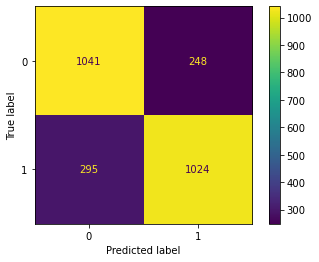

In [119]:
plot_confusion_matrix(eclf1, scaled_X_test, y_test,)

In [120]:
print(classification_report(y_test, vot_predict))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1289
           1       0.81      0.78      0.79      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608

